In [1]:
### exploring when in the week a student will get a reply based on when they annotate

### Get hypothes.is data 

### Get ID, reference, date data 

##### Get ID data

In [2]:
id_data = pd.DataFrame(df_rows_final['id'])
id_data.head()

,id
0,HVgnNBhJEeqN00NTntHbgw
1,n5jyJBhIEeqcjTvpF8ZbZQ
2,h9uuJBhIEeqqdF-F64ajtQ
3,L3ZfDhhIEeqN0lfQ6VW8ZA
4,DAKXLBhIEeqBr_eSvsal3A


##### Get references data 

In [3]:
df_references = pd.DataFrame(df_rows_final['references'])
df_references.head()

,references
0,NaN
1,[MwLylhPiEeqKA4eaV6pn6A]
2,[otMwehRrEeq-uq9xmuYZeA]
3,[fNIDQBUwEeqTXAs7Qt1pOg]
4,[dGTcAhUGEeqiVQMf18gCfA]


##### Clean reference data 

In [4]:
df_references_dropna = df_references.dropna()
df_references_dropna.head()

,references
1,[MwLylhPiEeqKA4eaV6pn6A]
2,[otMwehRrEeq-uq9xmuYZeA]
3,[fNIDQBUwEeqTXAs7Qt1pOg]
4,[dGTcAhUGEeqiVQMf18gCfA]
8,"[I2Ve2BRZEeqIHreDAnqGtA, AW4X1BVEEeqJ3E-3IaB1tw]"


##### Remove entries w/ multiple references

In [5]:
df_references_dropna['list'] = df_references_dropna["references"].str.len()
df_references_dropna.sort_values('list').head()

/Users/baselhussein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,references,list
1,[MwLylhPiEeqKA4eaV6pn6A],1
672,[4fhqouY8Eem1OvNP6KaSDw],1
670,[6WV9cOY3Eem9cIc9rPeMoA],1
668,[-K5lmOYkEemrH8Na5gMuwg],1
666,[y8W5nOTFEemKX2coXpzmvw],1


In [6]:
df_references_dropna.loc[df_references_dropna.list == 2, 'references'] = "B"
df_references_dropna.loc[df_references_dropna.list == 3, 'references'] = "B"
df_references_dropna.loc[df_references_dropna.list == 4, 'references'] = "B"
df_references_dropna.loc[df_references_dropna.list == 5, 'references'] = "B"


df_references_dropna.head()

/Users/baselhussein/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,references,list
1,[MwLylhPiEeqKA4eaV6pn6A],1
2,[otMwehRrEeq-uq9xmuYZeA],1
3,[fNIDQBUwEeqTXAs7Qt1pOg],1
4,[dGTcAhUGEeqiVQMf18gCfA],1
8,B,2


In [7]:
df_references_dropna_adjusted = pd.DataFrame(df_references_dropna['references'])
df_references_dropna_adjusted.columns = ['reference_id']
df_references_dropna_adjusted.head()

,reference_id
1,[MwLylhPiEeqKA4eaV6pn6A]
2,[otMwehRrEeq-uq9xmuYZeA]
3,[fNIDQBUwEeqTXAs7Qt1pOg]
4,[dGTcAhUGEeqiVQMf18gCfA]
8,B


##### Combine adjusted references w/ NaN values to concatenate later

In [8]:
df_adjusted_references = pd.concat([df_references, df_references_dropna_adjusted], axis=1)
df_adjusted_references.head()

,references,reference_id
0,NaN,NaN
1,[MwLylhPiEeqKA4eaV6pn6A],[MwLylhPiEeqKA4eaV6pn6A]
2,[otMwehRrEeq-uq9xmuYZeA],[otMwehRrEeq-uq9xmuYZeA]
3,[fNIDQBUwEeqTXAs7Qt1pOg],[fNIDQBUwEeqTXAs7Qt1pOg]
4,[dGTcAhUGEeqiVQMf18gCfA],[dGTcAhUGEeqiVQMf18gCfA]


In [9]:
df_adjusted_reference_id = pd.DataFrame(df_adjusted_references['reference_id'])
df_adjusted_reference_id.head()

,reference_id
0,NaN
1,[MwLylhPiEeqKA4eaV6pn6A]
2,[otMwehRrEeq-uq9xmuYZeA]
3,[fNIDQBUwEeqTXAs7Qt1pOg]
4,[dGTcAhUGEeqiVQMf18gCfA]


In [10]:
### fill NaN values w/ 'A' for Annotation 

df_references_fillna = df_adjusted_reference_id.fillna('A')
df_references_fillna.head()

,reference_id
0,A
1,[MwLylhPiEeqKA4eaV6pn6A]
2,[otMwehRrEeq-uq9xmuYZeA]
3,[fNIDQBUwEeqTXAs7Qt1pOg]
4,[dGTcAhUGEeqiVQMf18gCfA]


##### Get nested entries from references 

In [11]:
def get_references():
    for ID in df_references_fillna['reference_id']:
        ID_in_references = ID
        for nested_ID in ID_in_references:
            extracted_nested_ID = nested_ID
            extracted_ID.append(extracted_nested_ID)

extracted_ID = []
get_references()
extracted_ID

['A',
 'MwLylhPiEeqKA4eaV6pn6A',
 'otMwehRrEeq-uq9xmuYZeA',
 'fNIDQBUwEeqTXAs7Qt1pOg',
 'dGTcAhUGEeqiVQMf18gCfA',
 'A',
 'A',
 'A',
 'B',
 'A',
 'I2Ve2BRZEeqIHreDAnqGtA',
 'A',
 '9dQD1BRsEeqfM1N1T9As7g',
 'A',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'XBdwnhS5EeqN2htdmn1XAw',
 'A',
 'A',
 'MB0HUhTHEeqICIf31ZFVbQ',
 'A',
 'B',
 'A',
 'A',
 'B',
 'B',
 'fwBiRBS7Eeq9uSfK3Rb6vA',
 'A',
 'B',
 'A',
 '9dQD1BRsEeqfM1N1T9As7g',
 'cjFifhF-EeqOBE8J7xGrVg',
 'g6cfEhRsEeqFwDsqJtMgdw',
 'us9GShF0Eeq4BUfmxg9c6g',
 'B',
 'otMwehRrEeq-uq9xmuYZeA',
 'bHtxvBRiEeqGhN-EYoxYJQ',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'A',
 'cjFifhF-EeqOBE8J7xGrVg',
 'B',
 'A',
 'A',
 's792YBRWEeqGGXd_05TjEQ',
 'A',
 'A',
 '9dQD1BRsEeqfM1N1T9As7g',
 'H9P7hhGDEeq3vCMQvju7aw',
 'xGDDhBRqEeqpI4f1PtEk_g',
 'bcqORhPfEeq8v6ebkyjSVQ',
 'A',
 'bcqORhPfEeq8v6ebkyjSVQ',
 'A',
 'A',
 'A',
 'A',
 'A',
 'bcqORhPfEeq8v6ebkyjSVQ',
 'A',
 'lajKvBPgEeqKArOhC7T26w',
 'B',
 'I2Ve2BRZEeqIHreDAnqGtA',
 'Ujz5NBRXEeqqRoNop5HZqw',
 'A',
 'A',
 'A',
 'A'

In [12]:
df_extracted_ID = pd.DataFrame(extracted_ID)
df_extracted_ID.columns = ['references_clean']
df_extracted_ID.head()

,references_clean
0,A
1,MwLylhPiEeqKA4eaV6pn6A
2,otMwehRrEeq-uq9xmuYZeA
3,fNIDQBUwEeqTXAs7Qt1pOg
4,dGTcAhUGEeqiVQMf18gCfA


##### Get date data

In [13]:
time_updated_data = pd.DataFrame(df_rows_final['updated'])
time_updated_data['updated'] = pd.to_datetime(time_updated_data.updated)
time_updated_data.head()

,updated
0,2019-12-06 16:54:49.170327+00:00
1,2019-12-06 16:51:18.215960+00:00
2,2019-12-06 16:50:38.358741+00:00
3,2019-12-06 16:48:10.099768+00:00
4,2019-12-06 16:47:10.603331+00:00


In [14]:
time_updated_data.dtypes

updated    datetime64[ns, UTC]
dtype: object

### Convert dates to CST time

In [15]:
time_updated_data['updated'] = time_updated_data['updated'].dt.tz_convert('US/Central')
time_updated_data.head()

,updated
0,2019-12-06 10:54:49.170327-06:00
1,2019-12-06 10:51:18.215960-06:00
2,2019-12-06 10:50:38.358741-06:00
3,2019-12-06 10:48:10.099768-06:00
4,2019-12-06 10:47:10.603331-06:00


##### Get days of week 

In [16]:
df_weekday = pd.DataFrame(time_updated_data['updated'].dt.day_name())
df_weekday.columns = ['dayOfWeek']
df_weekday.head()

,dayOfWeek
0,Friday
1,Friday
2,Friday
3,Friday
4,Friday


##### Combine ID and References into DataFrame 

In [17]:
df_ID_references = pd.concat([id_data, df_extracted_ID], axis=1)
df_ID_references.head()

,id,references_clean
0,HVgnNBhJEeqN00NTntHbgw,A
1,n5jyJBhIEeqcjTvpF8ZbZQ,MwLylhPiEeqKA4eaV6pn6A
2,h9uuJBhIEeqqdF-F64ajtQ,otMwehRrEeq-uq9xmuYZeA
3,L3ZfDhhIEeqN0lfQ6VW8ZA,fNIDQBUwEeqTXAs7Qt1pOg
4,DAKXLBhIEeqBr_eSvsal3A,dGTcAhUGEeqiVQMf18gCfA


### Create columns to specify 'Annotation' or 'Reply'

In [18]:
df_remove_annotations = df_ID_references.loc[df_ID_references['references_clean'] != 'A']
df_remove_annotations.head()

,id,references_clean
1,n5jyJBhIEeqcjTvpF8ZbZQ,MwLylhPiEeqKA4eaV6pn6A
2,h9uuJBhIEeqqdF-F64ajtQ,otMwehRrEeq-uq9xmuYZeA
3,L3ZfDhhIEeqN0lfQ6VW8ZA,fNIDQBUwEeqTXAs7Qt1pOg
4,DAKXLBhIEeqBr_eSvsal3A,dGTcAhUGEeqiVQMf18gCfA
8,B4NWUhVJEeqRo799FHeNJg,B


In [19]:
df_remove_multiple = df_remove_annotations.loc[df_remove_annotations['references_clean'] != 'B']
df_remove_multiple.head()

,id,references_clean
1,n5jyJBhIEeqcjTvpF8ZbZQ,MwLylhPiEeqKA4eaV6pn6A
2,h9uuJBhIEeqqdF-F64ajtQ,otMwehRrEeq-uq9xmuYZeA
3,L3ZfDhhIEeqN0lfQ6VW8ZA,fNIDQBUwEeqTXAs7Qt1pOg
4,DAKXLBhIEeqBr_eSvsal3A,dGTcAhUGEeqiVQMf18gCfA
10,AW4X1BVEEeqJ3E-3IaB1tw,I2Ve2BRZEeqIHreDAnqGtA


##### Create column for 'Reply'

In [20]:
df_remove_multiple['reply'] = 'reply'
df_remove_multiple.head()

/Users/baselhussein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,references_clean,reply
1,n5jyJBhIEeqcjTvpF8ZbZQ,MwLylhPiEeqKA4eaV6pn6A,reply
2,h9uuJBhIEeqqdF-F64ajtQ,otMwehRrEeq-uq9xmuYZeA,reply
3,L3ZfDhhIEeqN0lfQ6VW8ZA,fNIDQBUwEeqTXAs7Qt1pOg,reply
4,DAKXLBhIEeqBr_eSvsal3A,dGTcAhUGEeqiVQMf18gCfA,reply
10,AW4X1BVEEeqJ3E-3IaB1tw,I2Ve2BRZEeqIHreDAnqGtA,reply


##### Create column for 'Annotation'

In [21]:
df_add_annotations = df_ID_references.loc[df_ID_references['references_clean'] == 'A']
df_add_annotations.head()

,id,references_clean
0,HVgnNBhJEeqN00NTntHbgw,A
5,370rUBhHEeq3aKNa2n0b6w,A
6,W-UOthXfEeq8NtOapWZrHA,A
7,ACYqZhXeEeqLHEtDPrzHxw,A
9,GG-jsBVGEeq2Qn_BzR42mQ,A


In [22]:
df_add_annotations['annotation'] = 'annotation'
df_add_annotations.head()

/Users/baselhussein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,references_clean,annotation
0,HVgnNBhJEeqN00NTntHbgw,A,annotation
5,370rUBhHEeq3aKNa2n0b6w,A,annotation
6,W-UOthXfEeq8NtOapWZrHA,A,annotation
7,ACYqZhXeEeqLHEtDPrzHxw,A,annotation
9,GG-jsBVGEeq2Qn_BzR42mQ,A,annotation


### Combine all columns into DataFrame

In [33]:
df_concat_annotation_reply = pd.concat([df_ID_references, df_add_annotations['annotation'], df_remove_multiple['reply'], time_updated_data, df_weekday], axis=1)
df_concat_annotation_reply.head(10)

,id,references_clean,annotation,reply,updated,dayOfWeek
0,HVgnNBhJEeqN00NTntHbgw,A,annotation,NaN,2019-12-06 10:54:49.170327-06:00,Friday
1,n5jyJBhIEeqcjTvpF8ZbZQ,MwLylhPiEeqKA4eaV6pn6A,NaN,reply,2019-12-06 10:51:18.215960-06:00,Friday
2,h9uuJBhIEeqqdF-F64ajtQ,otMwehRrEeq-uq9xmuYZeA,NaN,reply,2019-12-06 10:50:38.358741-06:00,Friday
3,L3ZfDhhIEeqN0lfQ6VW8ZA,fNIDQBUwEeqTXAs7Qt1pOg,NaN,reply,2019-12-06 10:48:10.099768-06:00,Friday
4,DAKXLBhIEeqBr_eSvsal3A,dGTcAhUGEeqiVQMf18gCfA,NaN,reply,2019-12-06 10:47:10.603331-06:00,Friday
5,370rUBhHEeq3aKNa2n0b6w,A,annotation,NaN,2019-12-06 10:45:56.256576-06:00,Friday
6,W-UOthXfEeq8NtOapWZrHA,A,annotation,NaN,2019-12-03 09:12:45.105944-06:00,Tuesday
7,ACYqZhXeEeqLHEtDPrzHxw,A,annotation,NaN,2019-12-03 09:03:01.721743-06:00,Tuesday
8,B4NWUhVJEeqRo799FHeNJg,B,NaN,NaN,2019-12-02 15:16:39.028530-06:00,Monday
9,GG-jsBVGEeq2Qn_BzR42mQ,A,annotation,NaN,2019-12-02 14:55:38.892009-06:00,Monday


In [34]:
df_concat_annotation_reply.to_csv('df_references_clean_1.csv', header = True, index = False)

##### Combine annotation and reply data

In [24]:
df_concat_annotation_reply.annotation.fillna(df_concat_annotation_reply.reply, inplace=True)
df_concat_annotation_reply.head()

,id,references_clean,annotation,reply,updated,dayOfWeek
0,HVgnNBhJEeqN00NTntHbgw,A,annotation,NaN,2019-12-06 10:54:49.170327-06:00,Friday
1,n5jyJBhIEeqcjTvpF8ZbZQ,MwLylhPiEeqKA4eaV6pn6A,reply,reply,2019-12-06 10:51:18.215960-06:00,Friday
2,h9uuJBhIEeqqdF-F64ajtQ,otMwehRrEeq-uq9xmuYZeA,reply,reply,2019-12-06 10:50:38.358741-06:00,Friday
3,L3ZfDhhIEeqN0lfQ6VW8ZA,fNIDQBUwEeqTXAs7Qt1pOg,reply,reply,2019-12-06 10:48:10.099768-06:00,Friday
4,DAKXLBhIEeqBr_eSvsal3A,dGTcAhUGEeqiVQMf18gCfA,reply,reply,2019-12-06 10:47:10.603331-06:00,Friday


##### Drop 'reply' column 

In [25]:
df_drop_reply = df_concat_annotation_reply.drop('reply', axis=1)
df_drop_reply.head()

,id,references_clean,annotation,updated,dayOfWeek
0,HVgnNBhJEeqN00NTntHbgw,A,annotation,2019-12-06 10:54:49.170327-06:00,Friday
1,n5jyJBhIEeqcjTvpF8ZbZQ,MwLylhPiEeqKA4eaV6pn6A,reply,2019-12-06 10:51:18.215960-06:00,Friday
2,h9uuJBhIEeqqdF-F64ajtQ,otMwehRrEeq-uq9xmuYZeA,reply,2019-12-06 10:50:38.358741-06:00,Friday
3,L3ZfDhhIEeqN0lfQ6VW8ZA,fNIDQBUwEeqTXAs7Qt1pOg,reply,2019-12-06 10:48:10.099768-06:00,Friday
4,DAKXLBhIEeqBr_eSvsal3A,dGTcAhUGEeqiVQMf18gCfA,reply,2019-12-06 10:47:10.603331-06:00,Friday


##### Drop 'Multiple' values

In [31]:
df_drop_multiple = df_drop_reply.dropna()
df_drop_multiple.head(10)

,id,references_clean,annotation,updated,dayOfWeek
0,HVgnNBhJEeqN00NTntHbgw,A,annotation,2019-12-06 10:54:49.170327-06:00,Friday
1,n5jyJBhIEeqcjTvpF8ZbZQ,MwLylhPiEeqKA4eaV6pn6A,reply,2019-12-06 10:51:18.215960-06:00,Friday
2,h9uuJBhIEeqqdF-F64ajtQ,otMwehRrEeq-uq9xmuYZeA,reply,2019-12-06 10:50:38.358741-06:00,Friday
3,L3ZfDhhIEeqN0lfQ6VW8ZA,fNIDQBUwEeqTXAs7Qt1pOg,reply,2019-12-06 10:48:10.099768-06:00,Friday
4,DAKXLBhIEeqBr_eSvsal3A,dGTcAhUGEeqiVQMf18gCfA,reply,2019-12-06 10:47:10.603331-06:00,Friday
5,370rUBhHEeq3aKNa2n0b6w,A,annotation,2019-12-06 10:45:56.256576-06:00,Friday
6,W-UOthXfEeq8NtOapWZrHA,A,annotation,2019-12-03 09:12:45.105944-06:00,Tuesday
7,ACYqZhXeEeqLHEtDPrzHxw,A,annotation,2019-12-03 09:03:01.721743-06:00,Tuesday
9,GG-jsBVGEeq2Qn_BzR42mQ,A,annotation,2019-12-02 14:55:38.892009-06:00,Monday
10,AW4X1BVEEeqJ3E-3IaB1tw,I2Ve2BRZEeqIHreDAnqGtA,reply,2019-12-02 14:40:41.379980-06:00,Monday


In [32]:
df_drop_multiple.to_csv('df_references_clean.csv', header = True, index = False)

##### Replace 'A' value w/ Annotation IDs

In [27]:
df_drop_multiple.loc[df_drop_multiple.references_clean == 'A', 'references_clean'] = df_drop_multiple.id
df_final = df_drop_multiple
df_final

/Users/baselhussein/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,references_clean,annotation,updated,dayOfWeek
0,HVgnNBhJEeqN00NTntHbgw,HVgnNBhJEeqN00NTntHbgw,annotation,2019-12-06 10:54:49.170327-06:00,Friday
1,n5jyJBhIEeqcjTvpF8ZbZQ,MwLylhPiEeqKA4eaV6pn6A,reply,2019-12-06 10:51:18.215960-06:00,Friday
2,h9uuJBhIEeqqdF-F64ajtQ,otMwehRrEeq-uq9xmuYZeA,reply,2019-12-06 10:50:38.358741-06:00,Friday
3,L3ZfDhhIEeqN0lfQ6VW8ZA,fNIDQBUwEeqTXAs7Qt1pOg,reply,2019-12-06 10:48:10.099768-06:00,Friday
4,DAKXLBhIEeqBr_eSvsal3A,dGTcAhUGEeqiVQMf18gCfA,reply,2019-12-06 10:47:10.603331-06:00,Friday
...,...,...,...,...,...
994,u1pUdNjLEemg9qfDq9BOGQ,Alw7Jtf1Eem2SOM2padHIQ,reply,2019-09-16 16:48:34.423116-05:00,Monday
995,RhMJrtjLEem4HbN_MPPeyQ,RhMJrtjLEem4HbN_MPPeyQ,annotation,2019-09-16 16:45:17.659145-05:00,Monday
997,4XniZtjJEempDBcTyYWaqg,rqGH1tihEempMMtVbgz8uA,reply,2019-09-16 16:36:23.601270-05:00,Monday
998,sn_fktjJEem_LE-Z_UItTw,sn_fktjJEem_LE-Z_UItTw,annotation,2019-09-16 16:34:00.568986-05:00,Monday


##### Reset indexes 

In [28]:
df_final = df_final.reset_index(drop=True)
df_final

,id,references_clean,annotation,updated,dayOfWeek
0,HVgnNBhJEeqN00NTntHbgw,HVgnNBhJEeqN00NTntHbgw,annotation,2019-12-06 10:54:49.170327-06:00,Friday
1,n5jyJBhIEeqcjTvpF8ZbZQ,MwLylhPiEeqKA4eaV6pn6A,reply,2019-12-06 10:51:18.215960-06:00,Friday
2,h9uuJBhIEeqqdF-F64ajtQ,otMwehRrEeq-uq9xmuYZeA,reply,2019-12-06 10:50:38.358741-06:00,Friday
3,L3ZfDhhIEeqN0lfQ6VW8ZA,fNIDQBUwEeqTXAs7Qt1pOg,reply,2019-12-06 10:48:10.099768-06:00,Friday
4,DAKXLBhIEeqBr_eSvsal3A,dGTcAhUGEeqiVQMf18gCfA,reply,2019-12-06 10:47:10.603331-06:00,Friday
...,...,...,...,...,...
897,u1pUdNjLEemg9qfDq9BOGQ,Alw7Jtf1Eem2SOM2padHIQ,reply,2019-09-16 16:48:34.423116-05:00,Monday
898,RhMJrtjLEem4HbN_MPPeyQ,RhMJrtjLEem4HbN_MPPeyQ,annotation,2019-09-16 16:45:17.659145-05:00,Monday
899,4XniZtjJEempDBcTyYWaqg,rqGH1tihEempMMtVbgz8uA,reply,2019-09-16 16:36:23.601270-05:00,Monday
900,sn_fktjJEem_LE-Z_UItTw,sn_fktjJEem_LE-Z_UItTw,annotation,2019-09-16 16:34:00.568986-05:00,Monday


In [29]:
df_final.set_index(["annotation", "dayOfWeek"]).count(level="annotation")

,id,references_clean,updated
annotation,,,
annotation,557,557,557
reply,345,345,345


### Visualizations

In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

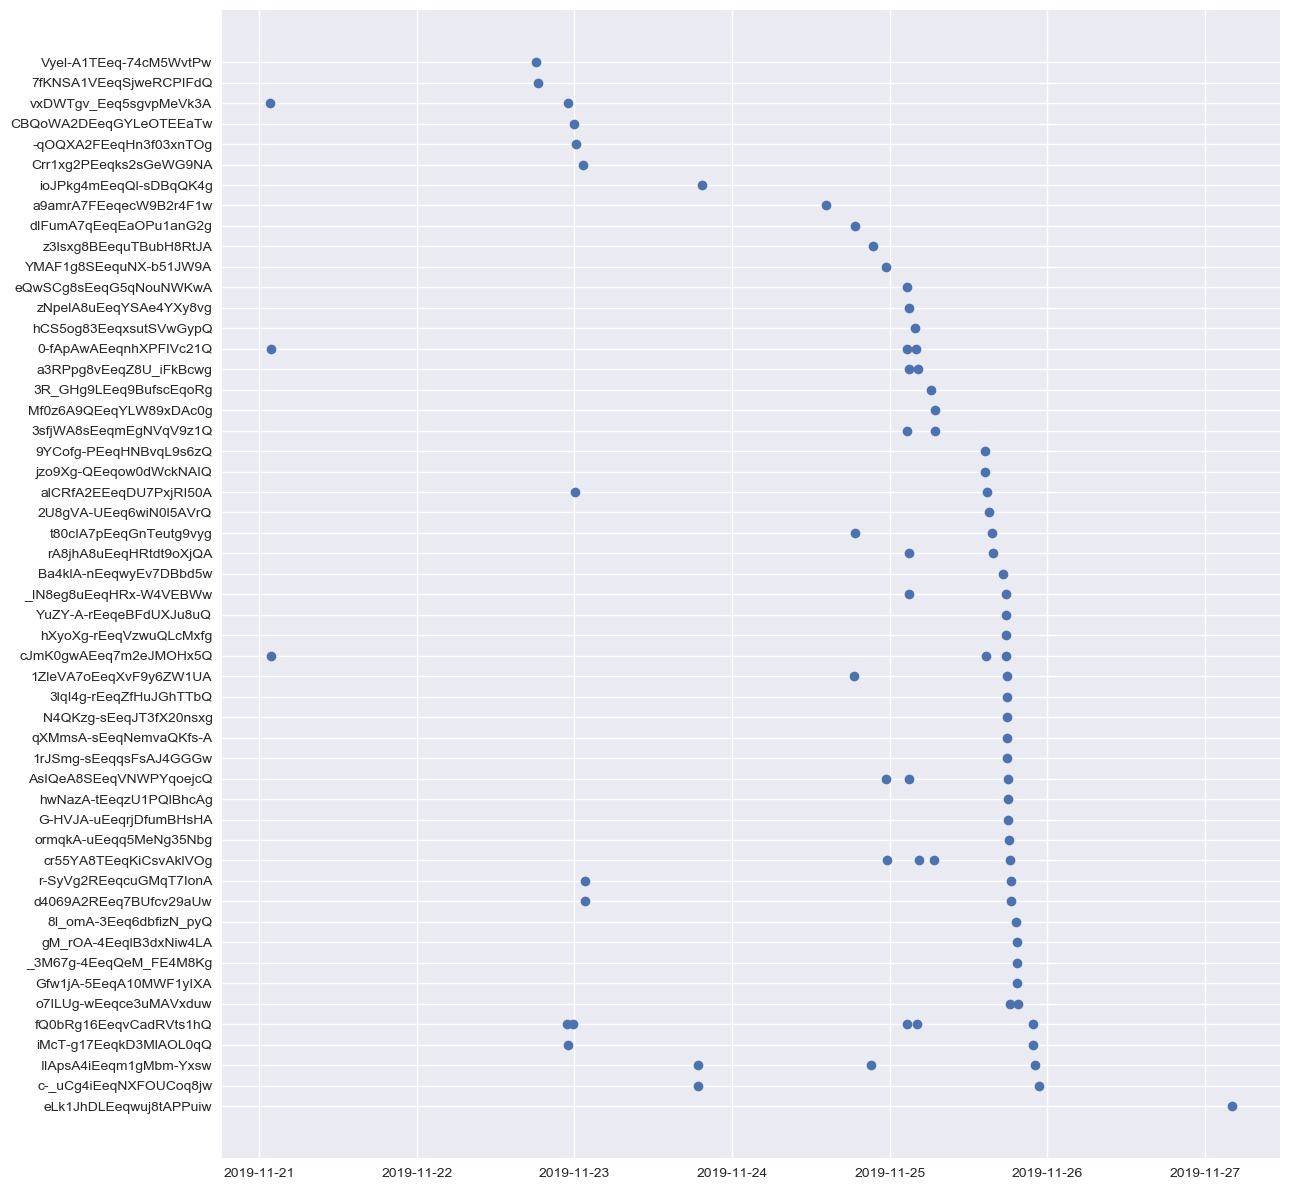

In [30]:
x = df_final['updated'][84:164] 
y = df_final['references_clean'][84:164]
figure(num=None, figsize=(13, 12), dpi=100, facecolor='w', edgecolor='k')
plt.style.use('seaborn')

plt.plot_date(x, y)
plt.tight_layout()